In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv('diabetes.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot: >

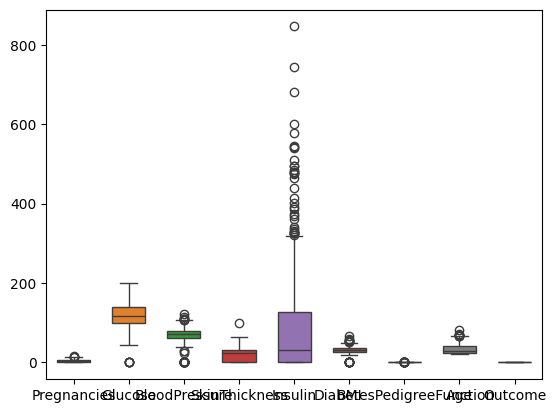

In [11]:

sns.boxplot(df,width=0.6)

In [12]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
X.shape

(768, 8)

<AxesSubplot: >

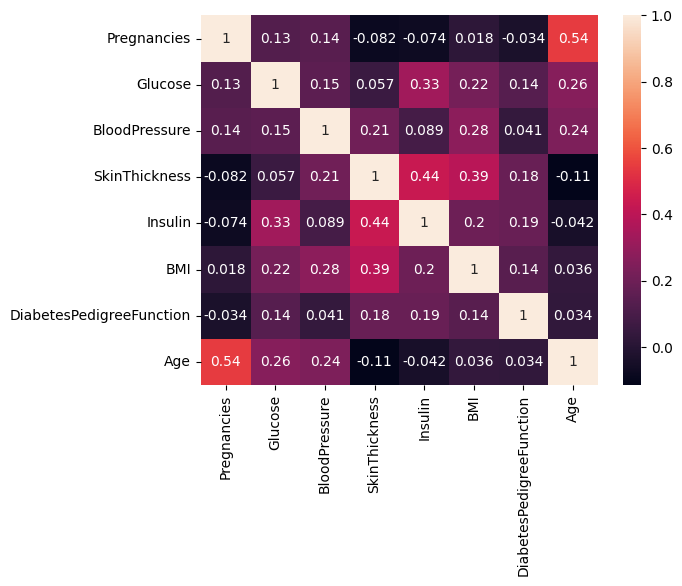

In [16]:
sns.heatmap(X.corr(),annot=True) # No extereme correllatinn between independent features 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=34)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
X_train_std=scaler.fit_transform(X_train)

In [25]:
X_test_std=scaler.fit_transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [29]:
model=LogisticRegression()

In [31]:
paramters={'penalty':('l2','elasticnet'), 'C':[1,5,10,20] ,'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']  }
grid=GridSearchCV(model,paramters,cv=5,)
grid.fit(X_train_std,y_train,)

C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python310\lib\site-packages\sklear

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 20], 'penalty': ('l2', 'elasticnet'),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [32]:
grid.best_estimator_

LogisticRegression(C=5)

In [33]:
grid.best_params_

{'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'}

In [34]:
model=LogisticRegression(C=5)

In [35]:
model.fit(X_train_std,y_train)

LogisticRegression(C=5)

In [37]:
y_pred=model.predict(X_test_std)

<AxesSubplot: >

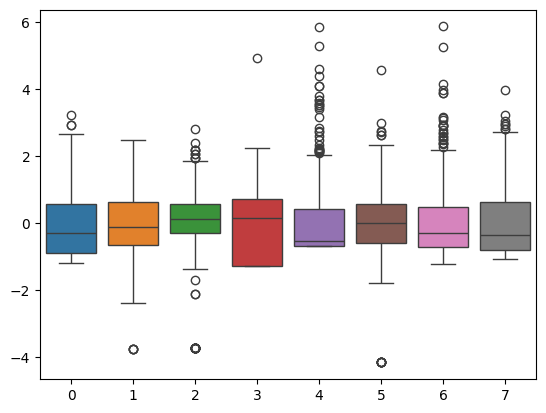

In [38]:
sns.boxplot(X_train_std)

In [39]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score

In [40]:
accuracy_score(y_test,y_pred)

0.8051948051948052

In [41]:
confusion_matrix(y_test,y_pred)

array([[95, 10],
       [20, 29]], dtype=int64)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.74      0.59      0.66        49

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



In [46]:
df['Outcome'].value_counts()   ## oops this is a mistake which we need to check earlier 

Outcome
0    500
1    268
Name: count, dtype: int64

### Mistakes or Potential Mistakes 

- If you see we got a very clean Data set , we are lucky which is not the case in real world we often get very very dirty data set 
- we kind of skipped the EDA or analysis on the dataset 
- we jumped quick to form the conclusion but the steps are correct though but they are without any analysis 
- atlast we checked is the dataset is a balanced dataset or not sadly it's not we might need to over sample it or  need to perform strtified analysis with Cross Validation
- if we didn't check numerical metrics like mean and std of dataset which helps in training this model with much better accuracy